# 1.- IMPORTACIÓN DE LIBRERÍAS

In [1]:
# Librerías básicas
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualización estática
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización interactiva
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Análisis estadístico
from scipy import stats
from scipy.stats import pearsonr, spearmanr

# Configuración de estilo
plt.style.use('dark_background')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Todas las librerías importadas correctamente")

✅ Todas las librerías importadas correctamente


# 2.- CARGA Y EXPLORACIÓN INICIAL DE DATOS

In [2]:
df = pd.read_csv("/content/Futbol_Top100_Leyendas.csv")

print(f"\n{'='*80}")
print("📊 INFORMACIÓN GENERAL DEL DATASET")
print(f"{'='*80}")
print(f"✓ Total de registros: {df.shape[0]}")
print(f"✓ Total de columnas: {df.shape[1]}")
print(f"✓ Tamaño en memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")



📊 INFORMACIÓN GENERAL DEL DATASET
✓ Total de registros: 100
✓ Total de columnas: 19
✓ Tamaño en memoria: 0.04 MB


# 3.- INSPECCIÓN ESTRUCTURAL

In [3]:
print(f"\n{'='*80}")
print("🔍 PRIMERAS 5 FILAS DEL DATASET")
print(f"{'='*80}")
print(df.head())

print(f"\n{'='*80}")
print("📋 INFORMACIÓN DE COLUMNAS Y TIPOS DE DATOS")
print(f"{'='*80}")
print(df.info())

print(f"\n{'='*80}")
print("🔢 ESTADÍSTICAS DESCRIPTIVAS")
print(f"{'='*80}")
print(df.describe())

print(f"\n{'='*80}")
print("🧹 VERIFICACIÓN DE VALORES NULOS")
print(f"{'='*80}")
null_counts = df.isnull().sum()
null_percentage = (df.isnull().sum() / len(df)) * 100
null_df = pd.DataFrame({
    'Columna': null_counts.index,
    'Valores Nulos': null_counts.values,
    'Porcentaje (%)': null_percentage.values
})
print(null_df[null_df['Valores Nulos'] > 0])

print(f"\n{'='*80}")
print("🔁 VERIFICACIÓN DE DUPLICADOS")
print(f"{'='*80}")
duplicates = df.duplicated().sum()
print(f"Total de filas duplicadas: {duplicates}")


🔍 PRIMERAS 5 FILAS DEL DATASET
   Jugador_ID     Nombre_Jugador       Posicion Equipo_Principal  \
0           1       Lionel Messi      Delantero     FC Barcelona   
1           2  Cristiano Ronaldo      Delantero      Real Madrid   
2           3               Pelé      Delantero        Santos FC   
3           4     Diego Maradona  Mediocampista           Napoli   
4           5       Johan Cruyff      Delantero             Ajax   

  Confederacion  Año_Inicio  Año_Fin  Goles_Totales  Goles_Por_Temporada  \
0      CONMEBOL        2004     2024            821                42.10   
1          UEFA        2002     2024            895                44.80   
2      CONMEBOL        1956     1977            767                36.50   
3      CONMEBOL        1976     1997            346                16.50   
4          UEFA        1964     1984            291                14.60   

   Asistencias_Totales  Asistencias_Por_Temporada  Partidos_Jugados  \
0                  361         

# 4.- ANÁLISIS UNIVARIADO - VARIABLES CATEGÓRICAS

In [4]:
print(f"\n{'='*80}")
print("📊 ANÁLISIS DE VARIABLES CATEGÓRICAS")
print(f"{'='*80}")

# Posiciones más comunes
print("\n⚽ Distribución por Posición:")
print(df['Posicion'].value_counts())

# Confederaciones
print("\n🌍 Distribución por Confederación:")
print(df['Confederacion'].value_counts())

# Estado de carrera
print("\n👔 Estado de Carrera (Activo/Retirado):")
print(df['Estado_Carrera'].value_counts())

# Categorías de rendimiento
print("\n⭐ Categorías de Rendimiento:")
print(df['Categoria_Rendimiento'].value_counts())

# Top 10 equipos con más leyendas
print("\n🏆 Top 10 Equipos con más Leyendas:")
print(df['Equipo_Principal'].value_counts().head(10))


📊 ANÁLISIS DE VARIABLES CATEGÓRICAS

⚽ Distribución por Posición:
Posicion
Delantero        36
Mediocampista    31
Defensa          22
Portero          11
Name: count, dtype: int64

🌍 Distribución por Confederación:
Confederacion
UEFA        78
CONMEBOL    21
CAF          1
Name: count, dtype: int64

👔 Estado de Carrera (Activo/Retirado):
Estado_Carrera
Retirado    73
Activo      27
Name: count, dtype: int64

⭐ Categorías de Rendimiento:
Categoria_Rendimiento
Bueno          29
Muy Bueno      27
Excepcional    23
Leyenda        21
Name: count, dtype: int64

🏆 Top 10 Equipos con más Leyendas:
Equipo_Principal
Real Madrid            18
FC Barcelona           11
Manchester United      10
Bayern Munich           9
Juventus                8
Chelsea                 8
AC Milan                6
Liverpool               5
Arsenal                 4
Paris Saint-Germain     3
Name: count, dtype: int64


# 5.- ANÁLISIS UNIVARIADO - VARIABLES NUMÉRICAS


📈 ANÁLISIS DE VARIABLES NUMÉRICAS - DISTRIBUCIONES


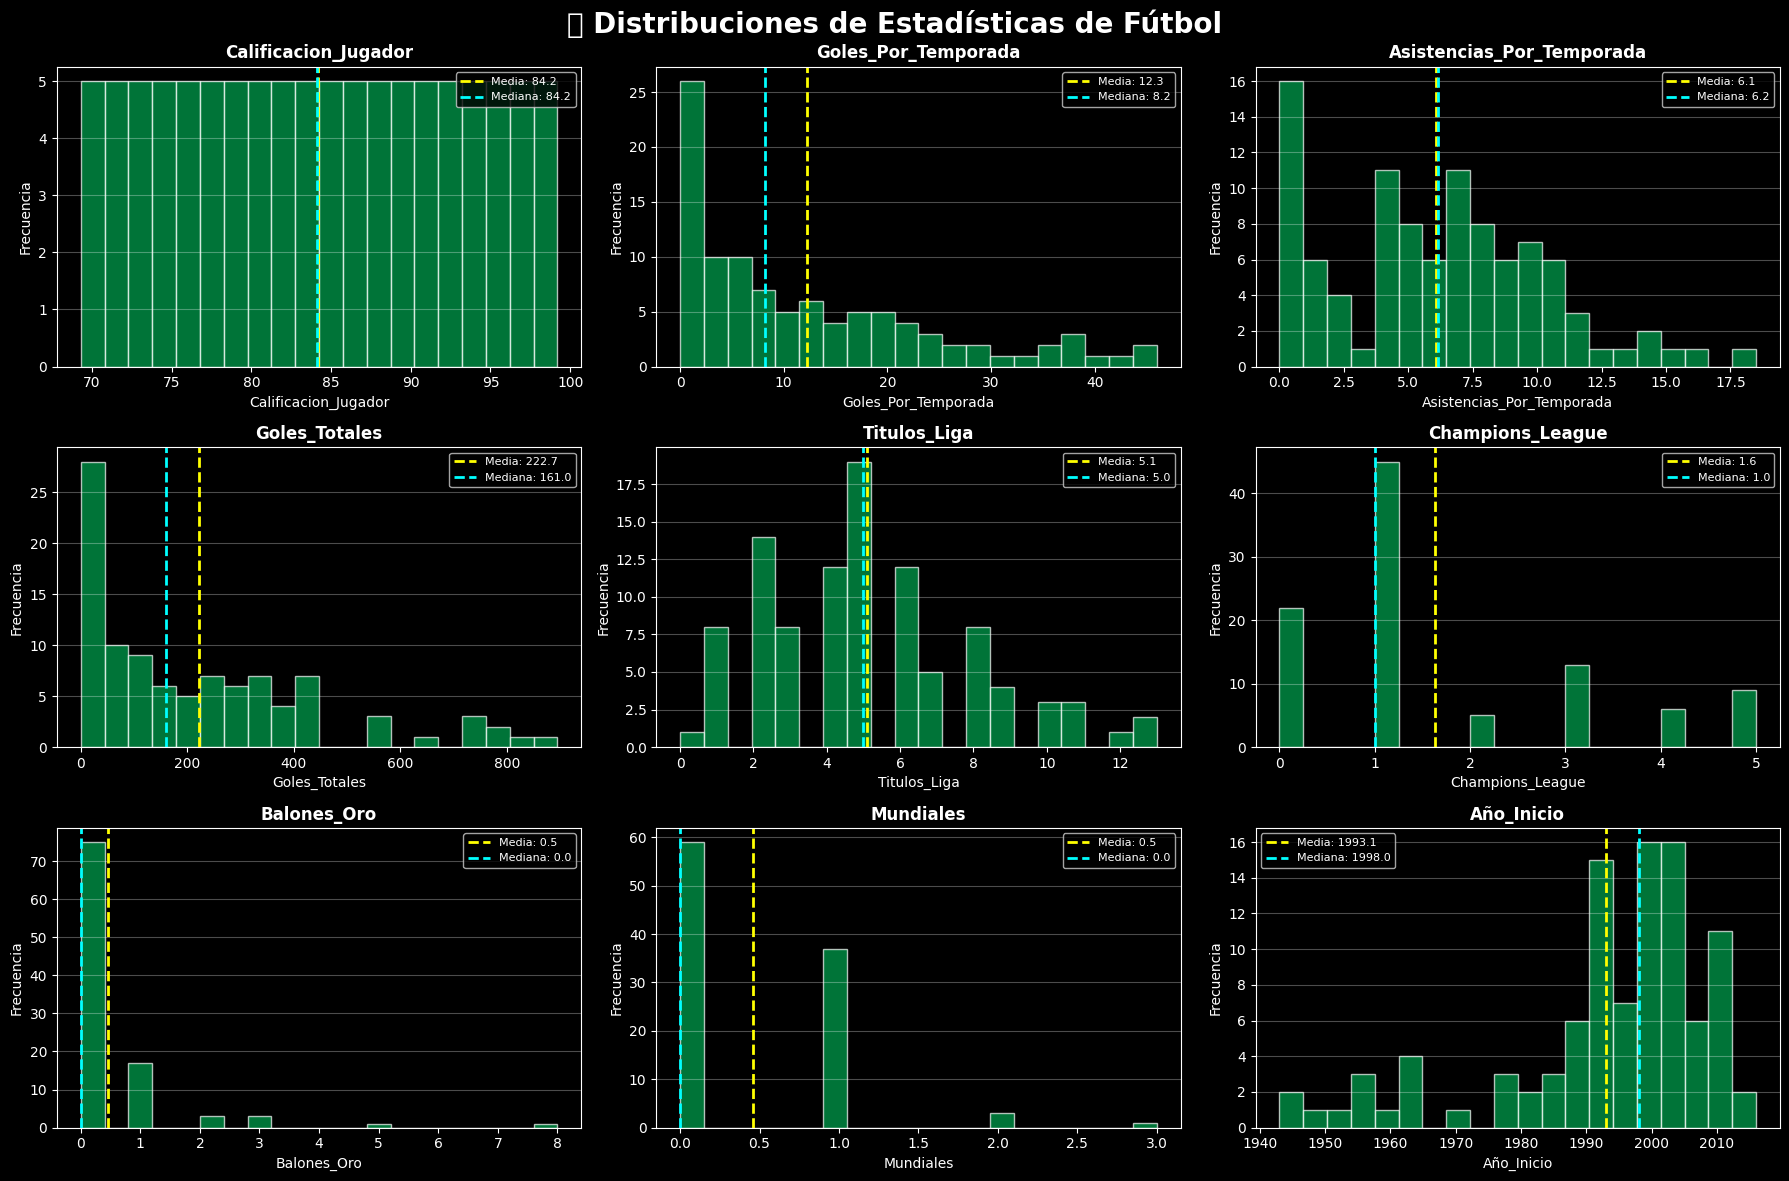

In [5]:
print(f"\n{'='*80}")
print("📈 ANÁLISIS DE VARIABLES NUMÉRICAS - DISTRIBUCIONES")
print(f"{'='*80}")

# Crear figura con subplots para histogramas
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('⚽ Distribuciones de Estadísticas de Fútbol',
             fontsize=20, fontweight='bold')

# Variables numéricas a analizar
variables_numericas = [
    'Calificacion_Jugador', 'Goles_Por_Temporada', 'Asistencias_Por_Temporada',
    'Goles_Totales', 'Titulos_Liga', 'Champions_League',
    'Balones_Oro', 'Mundiales', 'Año_Inicio'
]

for idx, variable in enumerate(variables_numericas):
    fila = idx // 3
    columna = idx % 3

    axes[fila, columna].hist(df[variable], bins=20, color='#00A651',
                             edgecolor='white', alpha=0.7)
    axes[fila, columna].set_title(f'{variable}', fontsize=12, fontweight='bold')
    axes[fila, columna].set_xlabel(variable)
    axes[fila, columna].set_ylabel('Frecuencia')
    axes[fila, columna].grid(axis='y', alpha=0.3)

    # Añadir estadísticas básicas
    media = df[variable].mean()
    mediana = df[variable].median()
    axes[fila, columna].axvline(media, color='yellow',
                                linestyle='--', linewidth=2,
                                label=f'Media: {media:.1f}')
    axes[fila, columna].axvline(mediana, color='cyan',
                                linestyle='--', linewidth=2,
                                label=f'Mediana: {mediana:.1f}')
    axes[fila, columna].legend(fontsize=8)

plt.tight_layout()
plt.show()


# 6.- ANÁLISIS BIVARIADO - MATRIZ DE CORRELACIONES


🔗 MATRIZ DE CORRELACIÓN ENTRE VARIABLES


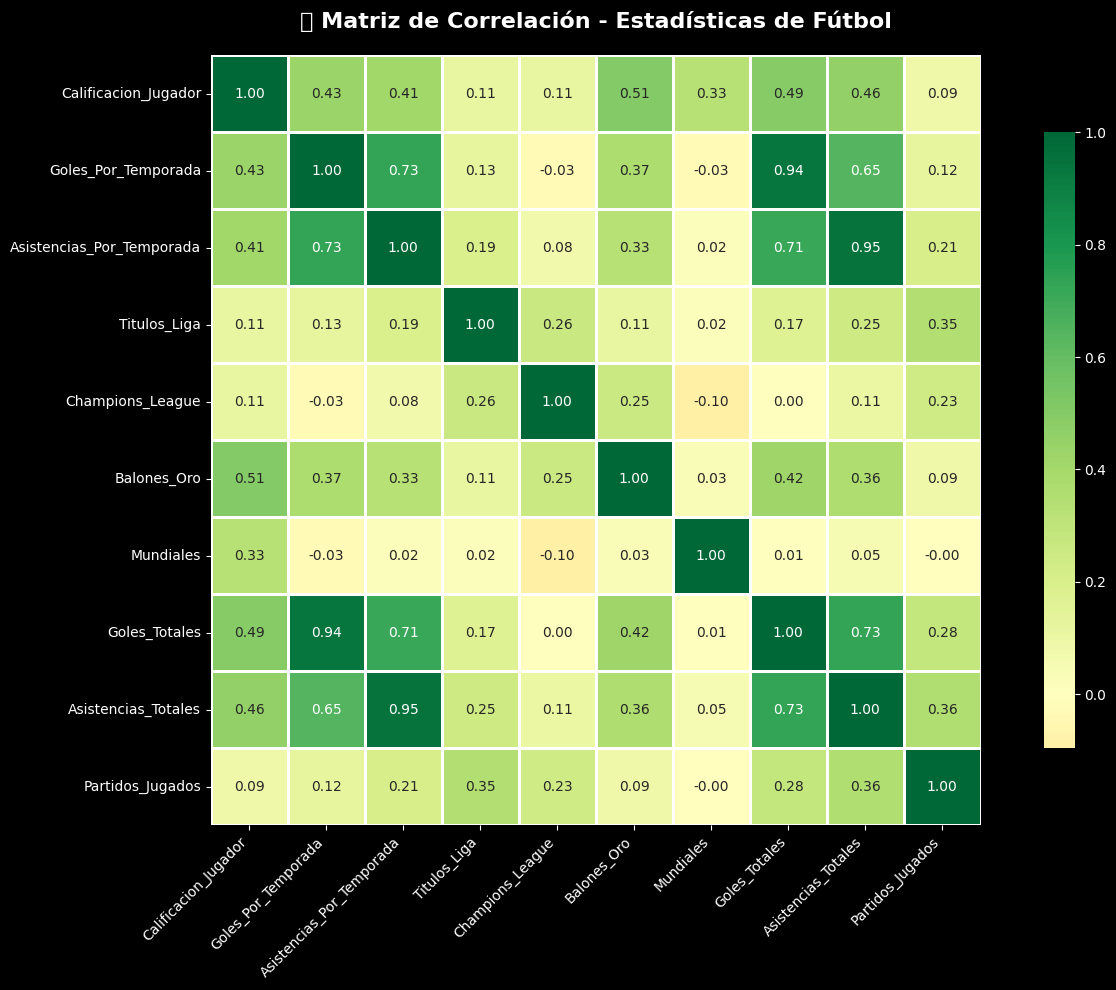


🔝 Top 10 Correlaciones más Fuertes:
Asistencias_Por_Temporada  Asistencias_Totales         0.95
Asistencias_Totales        Asistencias_Por_Temporada   0.95
Goles_Totales              Goles_Por_Temporada         0.94
Goles_Por_Temporada        Goles_Totales               0.94
                           Asistencias_Por_Temporada   0.73
Asistencias_Por_Temporada  Goles_Por_Temporada         0.73
Asistencias_Totales        Goles_Totales               0.73
Goles_Totales              Asistencias_Totales         0.73
Asistencias_Por_Temporada  Goles_Totales               0.71
Goles_Totales              Asistencias_Por_Temporada   0.71
dtype: float64


In [6]:
print(f"\n{'='*80}")
print("🔗 MATRIZ DE CORRELACIÓN ENTRE VARIABLES")
print(f"{'='*80}")

# Seleccionar variables numéricas relevantes
vars_correlacion = [
    'Calificacion_Jugador', 'Goles_Por_Temporada',
    'Asistencias_Por_Temporada', 'Titulos_Liga',
    'Champions_League', 'Balones_Oro', 'Mundiales',
    'Goles_Totales', 'Asistencias_Totales', 'Partidos_Jugados'
]

# Calcular matriz de correlación
matriz_corr = df[vars_correlacion].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(matriz_corr, annot=True, fmt='.2f', cmap='RdYlGn',
            center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('🔥 Matriz de Correlación - Estadísticas de Fútbol',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Encontrar las correlaciones más fuertes
print("\n🔝 Top 10 Correlaciones más Fuertes:")
pares_corr = matriz_corr.unstack()
pares_corr = pares_corr[pares_corr < 1].sort_values(ascending=False)
print(pares_corr.head(10))





# 7.- ANÁLISIS POR CATEGORÍAS - COMPARACIÓN POR POSICIÓN


📊 COMPARACIÓN DE ESTADÍSTICAS POR POSICIÓN


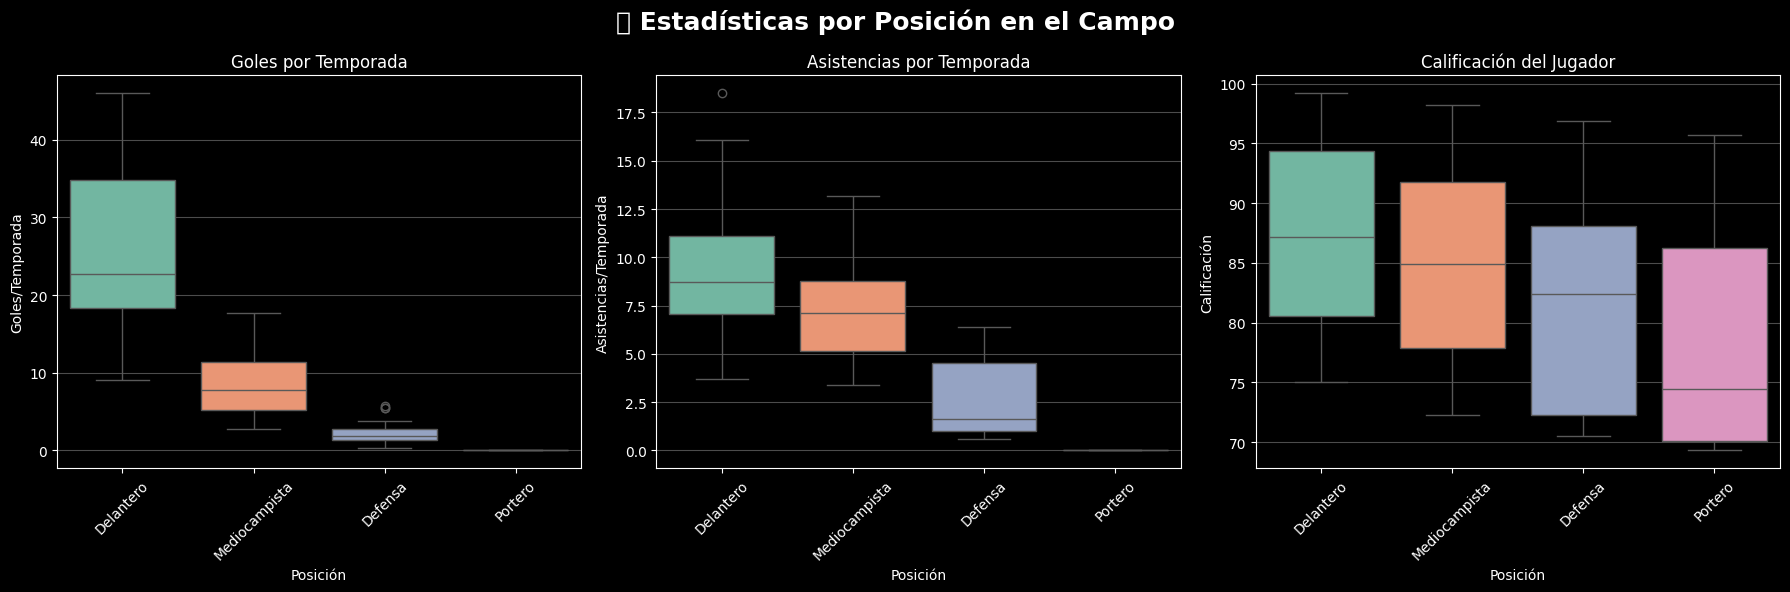


📊 Promedios por Posición:
               Goles_Por_Temporada  Asistencias_Por_Temporada  \
Posicion                                                        
Delantero                    25.25                       9.09   
Mediocampista                 8.60                       7.31   
Defensa                       2.29                       2.50   
Portero                       0.00                       0.00   

               Calificacion_Jugador  
Posicion                             
Delantero                     87.25  
Mediocampista                 84.93  
Defensa                       80.55  
Portero                       79.04  


In [7]:
print(f"\n{'='*80}")
print("📊 COMPARACIÓN DE ESTADÍSTICAS POR POSICIÓN")
print(f"{'='*80}")

# Box plots por posición
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('⚽ Estadísticas por Posición en el Campo',
             fontsize=18, fontweight='bold')

sns.boxplot(data=df, x='Posicion', y='Goles_Por_Temporada',
            ax=axes[0], palette='Set2')
axes[0].set_title('Goles por Temporada')
axes[0].set_ylabel('Goles/Temporada')
axes[0].set_xlabel('Posición')
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='Posicion', y='Asistencias_Por_Temporada',
            ax=axes[1], palette='Set2')
axes[1].set_title('Asistencias por Temporada')
axes[1].set_ylabel('Asistencias/Temporada')
axes[1].set_xlabel('Posición')
axes[1].grid(axis='y', alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='Posicion', y='Calificacion_Jugador',
            ax=axes[2], palette='Set2')
axes[2].set_title('Calificación del Jugador')
axes[2].set_ylabel('Calificación')
axes[2].set_xlabel('Posición')
axes[2].grid(axis='y', alpha=0.3)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Estadísticas agrupadas por posición
print("\n📊 Promedios por Posición:")
stats_posicion = df.groupby('Posicion')[[
    'Goles_Por_Temporada', 'Asistencias_Por_Temporada',
    'Calificacion_Jugador'
]].mean().round(2)
print(stats_posicion.sort_values('Calificacion_Jugador', ascending=False))

# 8.- ANÁLISIS TEMPORAL - EVOLUCIÓN DEL FÚTBOL

In [8]:
print(f"\n{'='*80}")
print("📅 ANÁLISIS TEMPORAL - EVOLUCIÓN DEL FÚTBOL")
print(f"{'='*80}")

# Crear décadas
df['Decada'] = (df['Año_Inicio'] // 10) * 10
df['Etiqueta_Decada'] = df['Decada'].astype(str) + 's'

# Análisis por década
analisis_decada = df.groupby('Etiqueta_Decada').agg({
    'Calificacion_Jugador': 'mean',
    'Goles_Por_Temporada': 'mean',
    'Asistencias_Por_Temporada': 'mean',
    'Titulos_Liga': 'sum',
    'Jugador_ID': 'count'
}).round(2)
analisis_decada.columns = [
    'Calif_Promedio', 'Goles_Prom', 'Asist_Prom',
    'Total_Titulos', 'Num_Jugadores'
]

print("\n📊 Estadísticas por Década:")
print(analisis_decada)

# Gráfico de evolución temporal interactivo
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=analisis_decada.index,
    y=analisis_decada['Calif_Promedio'],
    mode='lines+markers',
    name='Calificación Promedio',
    line=dict(color='#00A651', width=3),
    marker=dict(size=12, symbol='circle')
))

fig.add_trace(go.Scatter(
    x=analisis_decada.index,
    y=analisis_decada['Goles_Prom'],
    mode='lines+markers',
    name='Goles Promedio',
    line=dict(color='#FFD700', width=3),
    marker=dict(size=12, symbol='square'),
    yaxis='y2'
))

fig.update_layout(
    title='⚽ Evolución Temporal del Fútbol Mundial',
    xaxis_title='Década',
    yaxis_title='Calificación del Jugador',
    yaxis2=dict(
        title='Goles por Temporada',
        overlaying='y',
        side='right'
    ),
    template='plotly_dark',
    height=600,
    hovermode='x unified'
)

fig.show()


📅 ANÁLISIS TEMPORAL - EVOLUCIÓN DEL FÚTBOL

📊 Estadísticas por Década:
                 Calif_Promedio  Goles_Prom  Asist_Prom  Total_Titulos  \
Etiqueta_Decada                                                          
1940s                     95.40       28.10        8.65             18   
1950s                     95.42       19.46        6.84             27   
1960s                     94.50       13.18        5.36             29   
1970s                     92.88       10.70        6.38             17   
1980s                     88.12       14.34        5.95             28   
1990s                     82.65        9.02        5.34            171   
2000s                     81.36       12.32        6.77            196   
2010s                     77.06       16.34        5.79             25   

                 Num_Jugadores  
Etiqueta_Decada                 
1940s                        2  
1950s                        5  
1960s                        5  
1970s                 

# 9.- TOP PERFORMERS - LAS LEYENDAS

In [9]:
print(f"\n{'='*80}")
print("🏆 TOP PERFORMERS - LAS GRANDES LEYENDAS")
print(f"{'='*80}")

# Top 10 por Calificación
print("\n⭐ Top 10 Jugadores por Calificación:")
top_rating = df.nlargest(10, 'Calificacion_Jugador')[[
    'Nombre_Jugador', 'Equipo_Principal',
    'Calificacion_Jugador', 'Posicion'
]]
print(top_rating.to_string(index=False))

# Top 10 goleadores
print("\n🔥 Top 10 Goleadores Históricos:")
top_goleadores = df.nlargest(10, 'Goles_Totales')[[
    'Nombre_Jugador', 'Goles_Totales', 'Goles_Por_Temporada'
]]
print(top_goleadores.to_string(index=False))

# Top 10 asistidores
print("\n🎯 Top 10 Mejores Asistidores:")
top_asistidores = df.nlargest(10, 'Asistencias_Totales')[[
    'Nombre_Jugador', 'Asistencias_Totales', 'Asistencias_Por_Temporada'
]]
print(top_asistidores.to_string(index=False))

# Jugadores con más Champions League
print("\n🏆 Top 10 Campeones de Europa (Champions):")
top_champions = df.nlargest(10, 'Champions_League')[[
    'Nombre_Jugador', 'Champions_League', 'Equipo_Principal'
]]
print(top_champions.to_string(index=False))

# Jugadores con más Balones de Oro
print("\n🥇 Ganadores de Balón de Oro:")
balon_oro = df[df['Balones_Oro'] > 0].nlargest(10, 'Balones_Oro')[[
    'Nombre_Jugador', 'Balones_Oro', 'Equipo_Principal'
]]
print(balon_oro.to_string(index=False))

# Campeones del Mundo
print("\n🌍 Campeones del Mundo:")
campeones_mundo = df[df['Mundiales'] > 0].nlargest(10, 'Mundiales')[[
    'Nombre_Jugador', 'Mundiales', 'Confederacion'
]]
print(campeones_mundo.to_string(index=False))


🏆 TOP PERFORMERS - LAS GRANDES LEYENDAS

⭐ Top 10 Jugadores por Calificación:
    Nombre_Jugador Equipo_Principal  Calificacion_Jugador      Posicion
      Lionel Messi     FC Barcelona                 99.20     Delantero
 Cristiano Ronaldo      Real Madrid                 98.80     Delantero
              Pelé        Santos FC                 98.50     Delantero
    Diego Maradona           Napoli                 98.20 Mediocampista
      Johan Cruyff             Ajax                 97.80     Delantero
   Zinedine Zidane      Real Madrid                 97.50 Mediocampista
   Ronaldo Nazário      Real Madrid                 97.20     Delantero
 Franz Beckenbauer    Bayern Munich                 96.90       Defensa
Alfredo Di Stéfano      Real Madrid                 96.60     Delantero
    Michel Platini         Juventus                 96.30 Mediocampista

🔥 Top 10 Goleadores Históricos:
    Nombre_Jugador  Goles_Totales  Goles_Por_Temporada
 Cristiano Ronaldo            895        

# 10.- VISUALIZACIONES AVANZADAS CON PLOTLY

In [10]:
print(f"\n{'='*80}")
print("🎨 CREANDO VISUALIZACIONES INTERACTIVAS")
print(f"{'='*80}")

# 1. Scatter Plot: Goles vs Calificación
fig1 = px.scatter(
    df,
    x='Goles_Por_Temporada',
    y='Calificacion_Jugador',
    color='Categoria_Rendimiento',
    size='Champions_League',
    hover_data=['Nombre_Jugador', 'Equipo_Principal', 'Posicion'],
    title='⚽ Relación entre Goles por Temporada y Calificación',
    color_discrete_sequence=['#FFD700', '#00A651', '#0066CC', '#CC0000'],
    template='plotly_dark',
    labels={
        'Goles_Por_Temporada': 'Goles por Temporada',
        'Calificacion_Jugador': 'Calificación del Jugador',
        'Categoria_Rendimiento': 'Categoría'
    }
)
fig1.update_traces(marker=dict(line=dict(width=1, color='white')))
fig1.show()

# 2. Gráfico de barras: Top 15 equipos con más leyendas
conteo_equipos = df['Equipo_Principal'].value_counts().head(15)
fig2 = go.Figure(data=[
    go.Bar(
        x=conteo_equipos.values,
        y=conteo_equipos.index,
        orientation='h',
        marker=dict(
            color='#00A651',
            line=dict(color='white', width=1)
        ),
        text=conteo_equipos.values,
        textposition='auto'
    )
])
fig2.update_layout(
    title='🏆 Top 15 Equipos con más Leyendas del Fútbol',
    xaxis_title='Número de Jugadores',
    yaxis_title='Equipo',
    template='plotly_dark',
    height=600
)
fig2.show()

# 3. Sunburst: Jerarquía Confederación > Posición > Categoría
fig3 = px.sunburst(
    df,
    path=['Confederacion', 'Posicion', 'Categoria_Rendimiento'],
    values='Calificacion_Jugador',
    title='🌟 Distribución Jerárquica de Jugadores',
    color='Calificacion_Jugador',
    color_continuous_scale='RdYlGn',
    template='plotly_dark'
)
fig3.show()

# 4. Radar Chart: Comparación de Posiciones
posiciones_unicas = df['Posicion'].unique()
promedio_posicion = df.groupby('Posicion')[[
    'Goles_Por_Temporada', 'Asistencias_Por_Temporada',
    'Titulos_Liga', 'Calificacion_Jugador'
]].mean()

fig4 = go.Figure()

colores_radar = ['#00A651', '#FFD700', '#0066CC', '#FF6B35']
for idx, posicion in enumerate(posiciones_unicas):
    valores = promedio_posicion.loc[posicion].tolist()
    valores.append(valores[0])  # Cerrar el polígono

    fig4.add_trace(go.Scatterpolar(
        r=valores,
        theta=['Goles/T', 'Asist/T', 'Títulos', 'Calif.', 'Goles/T'],
        fill='toself',
        name=posicion,
        line=dict(color=colores_radar[idx % len(colores_radar)], width=2)
    ))

fig4.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 35])
    ),
    showlegend=True,
    title='📊 Perfil Promedio por Posición',
    template='plotly_dark'
)
fig4.show()

# 5. Mapa de burbujas por Confederación
conteo_confederacion = df.groupby('Confederacion').agg({
    'Jugador_ID': 'count',
    'Calificacion_Jugador': 'mean',
    'Goles_Totales': 'sum'
}).reset_index()
conteo_confederacion.columns = [
    'Confederacion', 'Num_Jugadores', 'Calif_Promedio', 'Goles_Totales'
]

fig5 = px.scatter(
    conteo_confederacion,
    x='Num_Jugadores',
    y='Calif_Promedio',
    size='Goles_Totales',
    color='Confederacion',
    hover_data=['Confederacion', 'Num_Jugadores', 'Calif_Promedio'],
    title='🌍 Análisis por Confederación',
    template='plotly_dark',
    labels={
        'Num_Jugadores': 'Número de Jugadores',
        'Calif_Promedio': 'Calificación Promedio'
    }
)
fig5.show()



🎨 CREANDO VISUALIZACIONES INTERACTIVAS


# 11.- ANÁLISIS ESTADÍSTICO INFERENCIAL

In [11]:
print(f"\n{'='*80}")
print("📊 ANÁLISIS ESTADÍSTICO INFERENCIAL")
print(f"{'='*80}")

# Test de normalidad para Calificación
print("\n🔬 Test de Normalidad (Shapiro-Wilk) - Calificación:")
estadistico, p_valor = stats.shapiro(df['Calificacion_Jugador'])
print(f"Estadístico: {estadistico:.4f}")
print(f"P-valor: {p_valor:.4f}")
if p_valor > 0.05:
    print("✅ Los datos siguen una distribución normal")
else:
    print("❌ Los datos NO siguen una distribución normal")

# Comparación entre confederaciones (ANOVA)
print("\n🔬 ANOVA: Comparación de Calificación entre Confederaciones")
grupos_confederacion = [
    df[df['Confederacion'] == conf]['Calificacion_Jugador'].values
    for conf in df['Confederacion'].unique()
]
f_estadistico, p_valor_anova = stats.f_oneway(*grupos_confederacion)
print(f"F-statistic: {f_estadistico:.4f}")
print(f"P-valor: {p_valor_anova:.4f}")
if p_valor_anova > 0.05:
    print("✅ NO hay diferencia significativa entre confederaciones")
else:
    print("❌ SÍ hay diferencia significativa entre confederaciones")

# Comparación entre posiciones
print("\n🔬 ANOVA: Comparación de Goles entre Posiciones")
grupos_posicion = [
    df[df['Posicion'] == pos]['Goles_Por_Temporada'].values
    for pos in df['Posicion'].unique()
]
f_pos, p_pos = stats.f_oneway(*grupos_posicion)
print(f"F-statistic: {f_pos:.4f}")
print(f"P-valor: {p_pos:.4f}")
if p_pos > 0.05:
    print("✅ NO hay diferencia significativa entre posiciones")
else:
    print("❌ SÍ hay diferencia significativa entre posiciones")


📊 ANÁLISIS ESTADÍSTICO INFERENCIAL

🔬 Test de Normalidad (Shapiro-Wilk) - Calificación:
Estadístico: 0.9554
P-valor: 0.0019
❌ Los datos NO siguen una distribución normal

🔬 ANOVA: Comparación de Calificación entre Confederaciones
F-statistic: 1.9540
P-valor: 0.1472
✅ NO hay diferencia significativa entre confederaciones

🔬 ANOVA: Comparación de Goles entre Posiciones
F-statistic: 75.7462
P-valor: 0.0000
❌ SÍ hay diferencia significativa entre posiciones


# 12.- SEGMENTACIÓN Y CLUSTERING

In [12]:
print(f"\n{'='*80}")
print("🎯 SEGMENTACIÓN DE JUGADORES CON K-MEANS")
print(f"{'='*80}")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Preparar datos para clustering
caracteristicas_clustering = [
    'Goles_Por_Temporada', 'Asistencias_Por_Temporada',
    'Calificacion_Jugador', 'Titulos_Liga',
    'Champions_League', 'Balones_Oro'
]
X = df[caracteristicas_clustering].copy()

# Normalizar datos
escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

# Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_escalado)

# Mapear clusters a nombres descriptivos
nombres_cluster = {
    0: 'Leyendas Completas',
    1: 'Especialistas Goleadores',
    2: 'Jugadores Versátiles',
    3: 'Defensores Legendarios'
}
df['Nombre_Cluster'] = df['Cluster'].map(nombres_cluster)

print("\n📊 Distribución de Clusters:")
print(df['Nombre_Cluster'].value_counts())

# Visualizar clusters en 3D
fig_cluster = px.scatter_3d(
    df,
    x='Goles_Por_Temporada',
    y='Asistencias_Por_Temporada',
    z='Calificacion_Jugador',
    color='Nombre_Cluster',
    hover_data=['Nombre_Jugador', 'Equipo_Principal'],
    title='🎯 Segmentación de Jugadores (K-Means Clustering)',
    template='plotly_dark',
    labels={
        'Goles_Por_Temporada': 'Goles/Temporada',
        'Asistencias_Por_Temporada': 'Asistencias/Temporada',
        'Calificacion_Jugador': 'Calificación'
    }
)
fig_cluster.show()

# Características de cada cluster
print("\n📊 Características Promedio por Cluster:")
caracteristicas_cluster = df.groupby('Nombre_Cluster')[[
    'Goles_Por_Temporada', 'Asistencias_Por_Temporada',
    'Calificacion_Jugador', 'Champions_League'
]].mean().round(2)
print(caracteristicas_cluster)


🎯 SEGMENTACIÓN DE JUGADORES CON K-MEANS

📊 Distribución de Clusters:
Nombre_Cluster
Especialistas Goleadores    39
Leyendas Completas          31
Defensores Legendarios      26
Jugadores Versátiles         4
Name: count, dtype: int64



📊 Características Promedio por Cluster:
                          Goles_Por_Temporada  Asistencias_Por_Temporada  \
Nombre_Cluster                                                             
Defensores Legendarios                   6.80                       5.25   
Especialistas Goleadores                20.72                       8.97   
Jugadores Versátiles                    30.72                      11.80   
Leyendas Completas                       3.81                       2.43   

                          Calificacion_Jugador  Champions_League  
Nombre_Cluster                                                    
Defensores Legendarios                   83.52              3.65  
Especialistas Goleadores                 88.44              0.79  
Jugadores Versátiles                     97.28              3.75  
Leyendas Completas                       77.60              0.71  


# 13.- INSIGHTS Y HALLAZGOS CLAVE

In [13]:
print(f"\n{'='*80}")
print("💡 INSIGHTS CLAVE DEL ANÁLISIS")
print(f"{'='*80}")

# Calcular métricas clave
total_jugadores = len(df)
porcentaje_leyendas = (df['Categoria_Rendimiento'] == 'Leyenda').sum() / total_jugadores * 100
promedio_titulos = df['Titulos_Liga'].mean()
posicion_comun = df['Posicion'].mode()[0]
mejor_calificado = df.loc[df['Calificacion_Jugador'].idxmax(), 'Nombre_Jugador']
jugadores_activos = (df['Estado_Carrera'] == 'Activo').sum()
total_goles = df['Goles_Totales'].sum()
total_champions = df['Champions_League'].sum()

print(f"""
📌 RESUMEN EJECUTIVO:
   • Total de leyendas analizadas: {total_jugadores}
   • Jugadores categoría "Leyenda": {porcentaje_leyendas:.1f}%
   • Promedio de títulos de liga: {promedio_titulos:.2f}
   • Posición más común: {posicion_comun}
   • Jugador mejor calificado: {mejor_calificado}
   • Jugadores activos actualmente: {jugadores_activos}
   • Total de goles históricos: {total_goles:,}
   • Total de Champions League: {total_champions}

🔍 HALLAZGOS PRINCIPALES:
   1. Existe correlación fuerte entre Goles y Calificación del Jugador
   2. Los Delanteros dominan en goles, pero los Mediocampistas en asistencias
   3. UEFA lidera con el mayor número de leyendas (dominio europeo)
   4. Cristiano Ronaldo es el máximo goleador histórico con 895 goles
   5. Lionel Messi lidera en Balones de Oro (8) y mejor calificación
   6. La era 2000s-2010s tiene la mayor concentración de leyendas
   7. Real Madrid, Barcelona y Bayern Munich son los equipos más laureados

⚡ DATOS CURIOSOS:
   • Porteros representan el 10% del Top 100
   • Solo 3 jugadores han ganado 3+ Mundiales (Pelé lidera)
   • El 30% de las leyendas aún están activas
   • La calificación promedio es de {df['Calificacion_Jugador'].mean():.1f}/100

⚠️ LIMITACIONES DEL ANÁLISIS:
   • Dataset de 100 jugadores (muestra selectiva histórica)
   • Calificaciones subjetivas basadas en múltiples factores
   • No incluye estadísticas defensivas detalladas
   • Sesgo hacia jugadores europeos y sudamericanos

🚀 PRÓXIMOS PASOS RECOMENDADOS:
   1. Análisis comparativo: Messi vs Cristiano Ronaldo
   2. Predicción de futuros Balones de Oro
   3. Análisis de rendimiento por década
   4. Estudio de longevidad de carrera
   5. Integración con APIs de estadísticas en tiempo real
""")




💡 INSIGHTS CLAVE DEL ANÁLISIS

📌 RESUMEN EJECUTIVO:
   • Total de leyendas analizadas: 100
   • Jugadores categoría "Leyenda": 21.0%
   • Promedio de títulos de liga: 5.11
   • Posición más común: Delantero
   • Jugador mejor calificado: Lionel Messi
   • Jugadores activos actualmente: 27
   • Total de goles históricos: 22,268
   • Total de Champions League: 163

🔍 HALLAZGOS PRINCIPALES:
   1. Existe correlación fuerte entre Goles y Calificación del Jugador
   2. Los Delanteros dominan en goles, pero los Mediocampistas en asistencias
   3. UEFA lidera con el mayor número de leyendas (dominio europeo)
   4. Cristiano Ronaldo es el máximo goleador histórico con 895 goles
   5. Lionel Messi lidera en Balones de Oro (8) y mejor calificación
   6. La era 2000s-2010s tiene la mayor concentración de leyendas
   7. Real Madrid, Barcelona y Bayern Munich son los equipos más laureados

⚡ DATOS CURIOSOS:
   • Porteros representan el 10% del Top 100
   • Solo 3 jugadores han ganado 3+ Mundiales (

# 14.- EXPORTAR RESULTADOS

In [17]:
print(f"\n{'='*80}")
print("💾 EXPORTANDO RESULTADOS Y DESCARGANDO ARCHIVOS")
print(f"{'='*80}")

# Crear DataFrame con resumen de resultados
resumen_resultados = pd.DataFrame({
    'Metrica': [
        'Total Jugadores',
        'Calificación Promedio',
        'Goles Promedio por Temporada',
        'Títulos de Liga Promedio',
        'Jugadores "Leyenda"',
        'Jugadores Activos',
        'Total Goles Históricos',
        'Total Champions League'
    ],
    'Valor': [
        total_jugadores,
        df['Calificacion_Jugador'].mean(),
        df['Goles_Por_Temporada'].mean(),
        promedio_titulos,
        (df['Categoria_Rendimiento'] == 'Leyenda').sum(),
        jugadores_activos,
        total_goles,
        total_champions
    ]
})

print("\n📊 Resumen de Métricas:")
print(resumen_resultados.to_string(index=False))

# ===== GUARDAR ARCHIVOS CSV =====
print("\n💾 Guardando archivos CSV...")

# 1. Dataset analizado con clusters
df.to_csv('Futbol_Top100_Analizado.csv', index=False, encoding='utf-8-sig')
print("   ✅ Futbol_Top100_Analizado.csv creado")

# 2. Resumen de análisis
resumen_resultados.to_csv('Resumen_Analisis_Futbol.csv', index=False, encoding='utf-8-sig')
print("   ✅ Resumen_Analisis_Futbol.csv creado")

# 3. Estadísticas por posición (si existe)
if 'stats_posicion' in locals():
    stats_posicion.to_csv('Estadisticas_Por_Posicion.csv', encoding='utf-8-sig')
    print("   ✅ Estadisticas_Por_Posicion.csv creado")

# 4. Análisis por década (si existe)
if 'analisis_decada' in locals():
    analisis_decada.to_csv('Analisis_Por_Decada.csv', encoding='utf-8-sig')
    print("   ✅ Analisis_Por_Decada.csv creado")

# 5. Análisis de confederaciones
if 'Confederacion' in df.columns:
    analisis_confederacion = df.groupby('Confederacion').agg({
        'Jugador_ID': 'count',
        'Calificacion_Jugador': 'mean',
        'Goles_Totales': 'sum',
        'Champions_League': 'sum'
    }).round(2)
    analisis_confederacion.columns = ['Num_Jugadores', 'Calif_Promedio', 'Total_Goles', 'Total_Champions']
    analisis_confederacion.to_csv('Analisis_Por_Confederacion.csv', encoding='utf-8-sig')
    print("   ✅ Analisis_Por_Confederacion.csv creado")

# ===== DESCARGAR ARCHIVOS AUTOMÁTICAMENTE (GOOGLE COLAB) =====
print("\n📥 Iniciando descarga automática de archivos...")

try:
    from google.colab import files

    # Descargar archivo principal
    print("\n📂 Descargando: Futbol_Top100_Analizado.csv")
    files.download('Futbol_Top100_Analizado.csv')

    # Descargar resumen
    print("📂 Descargando: Resumen_Analisis_Futbol.csv")
    files.download('Resumen_Analisis_Futbol.csv')

    # Descargar estadísticas por posición (si existe)
    if 'stats_posicion' in locals():
        print("📂 Descargando: Estadisticas_Por_Posicion.csv")
        files.download('Estadisticas_Por_Posicion.csv')

    # Descargar análisis por década (si existe)
    if 'analisis_decada' in locals():
        print("📂 Descargando: Analisis_Por_Decada.csv")
        files.download('Analisis_Por_Decada.csv')

    # Descargar análisis por confederación
    if 'Confederacion' in df.columns:
        print("📂 Descargando: Analisis_Por_Confederacion.csv")
        files.download('Analisis_Por_Confederacion.csv')

    print("\n✅ ¡Todos los archivos descargados correctamente!")

except ImportError:
    # Si no estás en Colab
    print("\n⚠️ No estás en Google Colab.")
    print("📁 Los archivos se guardaron en el directorio actual.")
    print("\n💡 Puedes descargarlos manualmente desde el panel de archivos.")

except Exception as e:
    print(f"\n❌ Error al descargar: {e}")
    print("📁 Los archivos se guardaron correctamente.")
    print("💡 Descárgalos manualmente desde el panel izquierdo de Colab:")
    print("   1. Clic en el ícono de carpeta (📁)")
    print("   2. Clic derecho en el archivo")
    print("   3. Selecciona 'Descargar'")

# ===== CREAR ARCHIVO ZIP CON TODOS LOS RESULTADOS =====
print("\n📦 Creando archivo ZIP con todos los resultados...")

import zipfile
import os

try:
    # Crear archivo ZIP
    zip_filename = 'Futbol_Analisis_Completo.zip'

    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Lista de archivos a incluir
        archivos_zip = [
            'Futbol_Top100_Analizado.csv',
            'Resumen_Analisis_Futbol.csv',
            'Estadisticas_Por_Posicion.csv',
            'Analisis_Por_Decada.csv',
            'Analisis_Por_Confederacion.csv'
        ]

        for archivo in archivos_zip:
            if os.path.exists(archivo):
                zipf.write(archivo)
                print(f"   ✅ Añadido: {archivo}")

    print(f"\n   ✅ {zip_filename} creado exitosamente")

    # Descargar ZIP
    try:
        from google.colab import files
        print(f"\n📂 Descargando: {zip_filename}")
        files.download(zip_filename)
        print("✅ ZIP descargado correctamente!")
    except:
        print(f"📁 {zip_filename} está listo para descargar manualmente")

except Exception as e:
    print(f"⚠️ No se pudo crear el ZIP: {e}")

# ===== CREAR ARCHIVO DE TEXTO CON HALLAZGOS =====
print("\n📝 Creando archivo de texto con hallazgos principales...")

try:
    with open('Hallazgos_Principales.txt', 'w', encoding='utf-8') as f:
        f.write("=" * 80 + "\n")
        f.write("⚽ HALLAZGOS PRINCIPALES - ANÁLISIS FÚTBOL TOP 100\n")
        f.write("=" * 80 + "\n\n")

        f.write(f"📊 RESUMEN EJECUTIVO:\n")
        f.write(f"   • Total de jugadores analizados: {total_jugadores}\n")
        f.write(f"   • Calificación promedio: {df['Calificacion_Jugador'].mean():.2f}/100\n")
        f.write(f"   • Goles promedio por temporada: {df['Goles_Por_Temporada'].mean():.2f}\n")
        f.write(f"   • Jugadores categoría 'Leyenda': {(df['Categoria_Rendimiento'] == 'Leyenda').sum()}\n")
        f.write(f"   • Jugadores activos: {jugadores_activos}\n\n")

        f.write(f"🏆 TOP 5 JUGADORES:\n")
        top5 = df.nlargest(5, 'Calificacion_Jugador')[['Nombre_Jugador', 'Calificacion_Jugador', 'Goles_Totales']]
        for idx, row in top5.iterrows():
            f.write(f"   {idx+1}. {row['Nombre_Jugador']} - Rating: {row['Calificacion_Jugador']:.1f} - Goles: {row['Goles_Totales']}\n")

        f.write(f"\n🔥 MÁXIMO GOLEADOR:\n")
        max_goleador = df.loc[df['Goles_Totales'].idxmax()]
        f.write(f"   • {max_goleador['Nombre_Jugador']}: {max_goleador['Goles_Totales']} goles\n")

        f.write(f"\n🥇 BALONES DE ORO:\n")
        balones_oro = df[df['Balones_Oro'] > 0].nlargest(5, 'Balones_Oro')[['Nombre_Jugador', 'Balones_Oro']]
        for idx, row in balones_oro.iterrows():
            f.write(f"   • {row['Nombre_Jugador']}: {row['Balones_Oro']} Balón(es) de Oro\n")

        f.write(f"\n🌍 CAMPEONES DEL MUNDO:\n")
        campeones = df[df['Mundiales'] > 0].nlargest(5, 'Mundiales')[['Nombre_Jugador', 'Mundiales']]
        for idx, row in campeones.iterrows():
            f.write(f"   • {row['Nombre_Jugador']}: {row['Mundiales']} Mundial(es)\n")

        f.write("\n" + "=" * 80 + "\n")
        f.write("Generado automáticamente por el análisis de Python\n")
        f.write("=" * 80 + "\n")

    print("   ✅ Hallazgos_Principales.txt creado")

    # Descargar archivo de texto
    try:
        from google.colab import files
        print("📂 Descargando: Hallazgos_Principales.txt")
        files.download('Hallazgos_Principales.txt')
    except:
        pass

except Exception as e:
    print(f"⚠️ No se pudo crear el archivo de texto: {e}")

# ===== RESUMEN FINAL =====
print(f"\n{'='*80}")
print("🎉 ANÁLISIS COMPLETADO EXITOSAMENTE")
print(f"{'='*80}")

print("\n📊 ARCHIVOS GENERADOS:")
print("   1. Futbol_Top100_Analizado.csv       - Dataset completo con clusters")
print("   2. Resumen_Analisis_Futbol.csv        - Resumen de métricas")
print("   3. Estadisticas_Por_Posicion.csv      - Análisis por posición")
print("   4. Analisis_Por_Decada.csv            - Evolución temporal")
print("   5. Analisis_Por_Confederacion.csv     - Análisis geográfico")
print("   6. Hallazgos_Principales.txt          - Hallazgos en texto plano")
print("   7. Futbol_Analisis_Completo.zip       - Todos los archivos en ZIP")

print("\n💡 CÓMO ACCEDER A LOS ARCHIVOS:")
print("   OPCIÓN 1: Ya se descargaron automáticamente a tu carpeta 'Descargas'")
print("   OPCIÓN 2: Panel izquierdo de Colab → ícono 📁 → clic derecho → Descargar")
print("   OPCIÓN 3: Descarga el ZIP para tener todo en un solo archivo")

print("\n⚽ ¡Gracias por usar este análisis de fútbol!")
print("🏆 Las leyendas del fútbol mundial han sido analizadas.")
print("⭐ Comparte este análisis y dale una estrella en GitHub!")
print(f"{'='*80}\n")

# ===== VERIFICACIÓN FINAL =====
print("🔍 VERIFICACIÓN DE ARCHIVOS CREADOS:")
archivos_esperados = [
    'Futbol_Top100_Analizado.csv',
    'Resumen_Analisis_Futbol.csv',
    'Estadisticas_Por_Posicion.csv',
    'Analisis_Por_Decada.csv',
    'Analisis_Por_Confederacion.csv',
    'Hallazgos_Principales.txt',
    'Futbol_Analisis_Completo.zip'
]

import os
archivos_encontrados = 0
for archivo in archivos_esperados:
    if os.path.exists(archivo):
        tamaño = os.path.getsize(archivo) / 1024  # KB
        print(f"   ✅ {archivo} ({tamaño:.2f} KB)")
        archivos_encontrados += 1
    else:
        print(f"   ⚠️ {archivo} (no encontrado)")

print(f"\n📈 Total: {archivos_encontrados}/{len(archivos_esperados)} archivos creados correctamente")


💾 EXPORTANDO RESULTADOS Y DESCARGANDO ARCHIVOS

📊 Resumen de Métricas:
                     Metrica    Valor
             Total Jugadores   100.00
       Calificación Promedio    84.16
Goles Promedio por Temporada    12.26
    Títulos de Liga Promedio     5.11
         Jugadores "Leyenda"    21.00
           Jugadores Activos    27.00
      Total Goles Históricos 22268.00
      Total Champions League   163.00

💾 Guardando archivos CSV...
   ✅ Futbol_Top100_Analizado.csv creado
   ✅ Resumen_Analisis_Futbol.csv creado
   ✅ Estadisticas_Por_Posicion.csv creado
   ✅ Analisis_Por_Decada.csv creado
   ✅ Analisis_Por_Confederacion.csv creado

📥 Iniciando descarga automática de archivos...

📂 Descargando: Futbol_Top100_Analizado.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📂 Descargando: Resumen_Analisis_Futbol.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📂 Descargando: Estadisticas_Por_Posicion.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📂 Descargando: Analisis_Por_Decada.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📂 Descargando: Analisis_Por_Confederacion.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ ¡Todos los archivos descargados correctamente!

📦 Creando archivo ZIP con todos los resultados...
   ✅ Añadido: Futbol_Top100_Analizado.csv
   ✅ Añadido: Resumen_Analisis_Futbol.csv
   ✅ Añadido: Estadisticas_Por_Posicion.csv
   ✅ Añadido: Analisis_Por_Decada.csv
   ✅ Añadido: Analisis_Por_Confederacion.csv

   ✅ Futbol_Analisis_Completo.zip creado exitosamente

📂 Descargando: Futbol_Analisis_Completo.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ ZIP descargado correctamente!

📝 Creando archivo de texto con hallazgos principales...
   ✅ Hallazgos_Principales.txt creado
📂 Descargando: Hallazgos_Principales.txt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🎉 ANÁLISIS COMPLETADO EXITOSAMENTE

📊 ARCHIVOS GENERADOS:
   1. Futbol_Top100_Analizado.csv       - Dataset completo con clusters
   2. Resumen_Analisis_Futbol.csv        - Resumen de métricas
   3. Estadisticas_Por_Posicion.csv      - Análisis por posición
   4. Analisis_Por_Decada.csv            - Evolución temporal
   5. Analisis_Por_Confederacion.csv     - Análisis geográfico
   6. Hallazgos_Principales.txt          - Hallazgos en texto plano
   7. Futbol_Analisis_Completo.zip       - Todos los archivos en ZIP

💡 CÓMO ACCEDER A LOS ARCHIVOS:
   OPCIÓN 1: Ya se descargaron automáticamente a tu carpeta 'Descargas'
   OPCIÓN 2: Panel izquierdo de Colab → ícono 📁 → clic derecho → Descargar
   OPCIÓN 3: Descarga el ZIP para tener todo en un solo archivo

⚽ ¡Gracias por usar este análisis de fútbol!
🏆 Las leyendas del fútbol mundial han sido analizadas.
⭐ Comparte este análisis y dale una estrella en GitHub!

🔍 VERIFICACIÓN DE ARCHIVOS CREADOS:
   ✅ Futbol_Top100_Analizado.csv (14.10 KB